Electric Vehicle Data Analysis Project

 Project Overview
 
 In this project, you will analyze a dataset related to electric vehicles (EVs). The dataset contains
 various features such as electric range, energy consumption, price, and other relevant
 attributes. Your goal is to conduct a thorough analysis to uncover meaningful insights, tell a
 compelling story, conduct hypothesis testing and provide actionable recommendations based on
 the data.

Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
 of 400 km.

In [5]:
# (a) filter out EVs that meet these criteria.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Load the dataset
df=pd.read_excel('FEV-data-Excel.xlsx')
# Filter EVs based on the given budget and range
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
# Display the filtered dataframe
filtered_df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [7]:
# (b) Group them by the manufacturer (make)
grouped_by_make =filtered_df.groupby('Make').size().reset_index(name="Number of Cars")
# groupby() function is used to group the filtered EVs by the manufacturer (Make)
# size() function is used to count the number of rows
# reset_index() function is used to convert this Series into a DataFrame and provides a new index
grouped_by_make 

,Make,Number of Cars
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


In [9]:
# (c) Calculate the average battery capacity for each manufacturer
# Group by manufacturer (make) and calculate the average battery capacity using mean() method
average_battery_capacity = filtered_df.groupby('Make')['Battery capacity [kWh]'].mean().reset_index(name="Average Battery Capacity")
average_battery_capacity

,Make,Average Battery Capacity
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


<Figure size 1200x600 with 0 Axes>

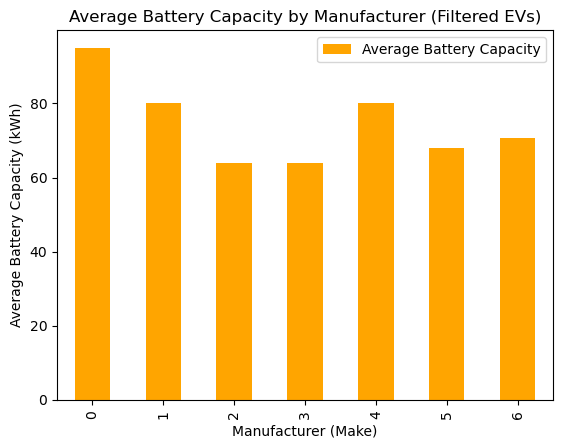

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))
average_battery_capacity.plot(kind='bar', color='orange')
plt.title("Average Battery Capacity by Manufacturer (Filtered EVs)")
plt.xlabel("Manufacturer (Make)")
plt.ylabel("Average Battery Capacity (kWh)")
plt.show()

Task 2: You suspect some EVs have unusually high or low energy consumption

count    44.000000
mean     18.994318
std       4.418253
min      13.100000
25%      15.600000
50%      17.050000
75%      23.500000
max      28.200000
Name: mean - Energy consumption [kWh/100 km], dtype: float64


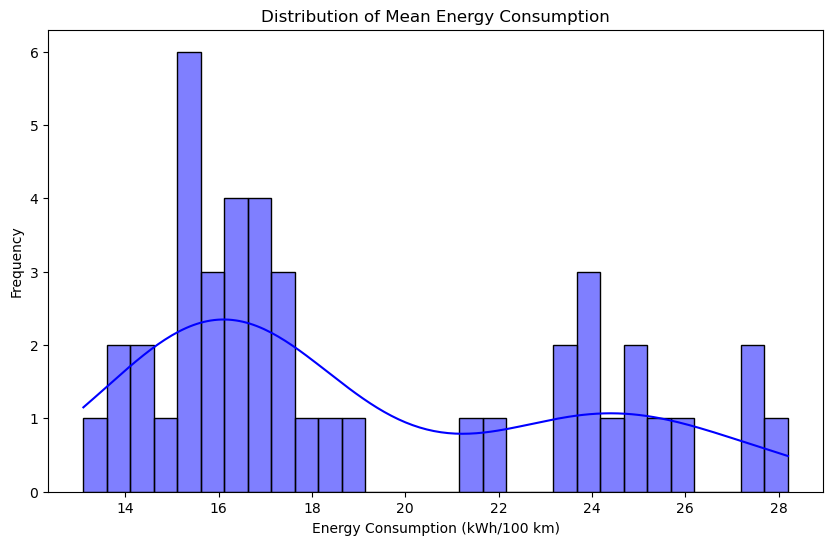

In [13]:
# Descriptive statistics for energy consumption
print(df['mean - Energy consumption [kWh/100 km]'].describe())

# Plot the distribution
plt.figure(figsize=(10, 6))
# plotting a histogram with a KDE (Kernel Density Estimate) overlay
sns.histplot(df['mean - Energy consumption [kWh/100 km]'], kde=True, bins=30, color='blue')
plt.title("Distribution of Mean Energy Consumption")
plt.xlabel("Energy Consumption (kWh/100 km)")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Find the outliers in the mean- Energy consumption [kWh/100 km] column
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)  # Third quartile (75th percentile)
# IQR (Interquartile Range) is a standard method for detecting outliers based on quartiles.
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | 
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

# Display outliers
outliers

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


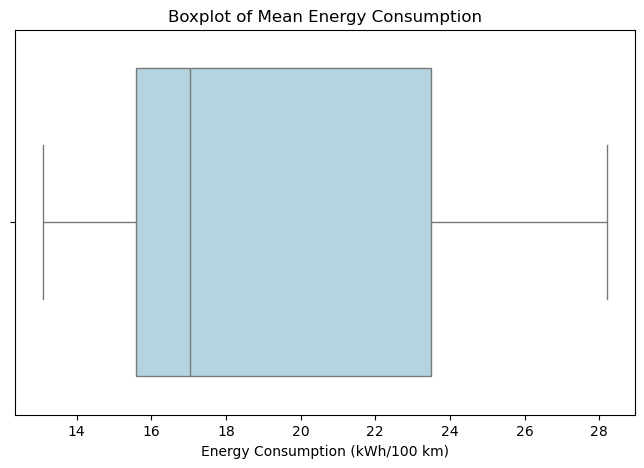

In [17]:
# A boxplot helps in quickly identifying outliers
# Set plot size
plt.figure(figsize=(8,5))
# Create a boxplot
sns.boxplot(x=df['mean - Energy consumption [kWh/100 km]'], color='lightblue')
# Add title
plt.title('Boxplot of Mean Energy Consumption')
plt.xlabel('Energy Consumption (kWh/100 km)')

# Show plot
plt.show()
# Any points outside the whiskers in the boxplot indicate outliers.

In [19]:
# To differentiate mild and extreme outliers, we can define extreme outliers as those beyond 3 × IQR.
# Define extreme outliers (3 * IQR rule)
extreme_lower_bound = Q1 - 3 * IQR
extreme_upper_bound = Q3 + 3 * IQR

# Filter extreme outliers
extreme_outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < extreme_lower_bound) | 
                      (df['mean - Energy consumption [kWh/100 km]'] > extreme_upper_bound)]

# Display extreme outliers
extreme_outliers

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


 Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.

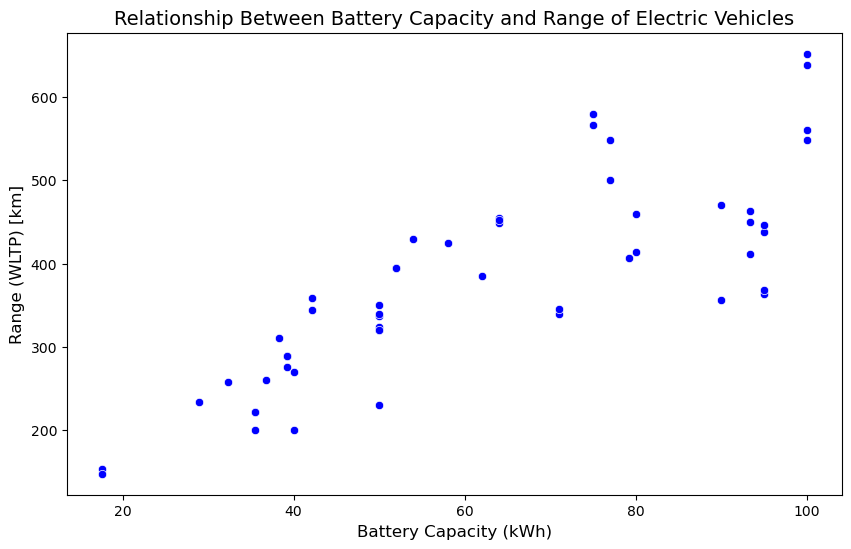

In [21]:
# Create a suitable plot to visualize
plt.figure(figsize = (10,6))

# Create scatter plot
sns.scatterplot(x=df['Battery capacity [kWh]'], y=df['Range (WLTP) [km]'], color="blue")

# Add titles and labels
plt.title("Relationship Between Battery Capacity and Range of Electric Vehicles", fontsize=14)
plt.xlabel("Battery Capacity (kWh)", fontsize=12)
plt.ylabel("Range (WLTP) [km]", fontsize=12)

# Show plot
plt.show()

In [23]:
# Calculate the correlation coefficient
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
print(f"Correlation between Battery Capacity and Range: {correlation}")

# Highlighting insights
print("\n### Highlighting Insights ###")

print("\n1. Strong Positive Correlation")
print("- A high correlation exists between battery capacity and driving range.")
print("- Larger battery capacities generally provide longer driving distances.")
print("- Consumers looking for long-range EVs should focus on high-capacity battery models.")

print("\n2. Outliers: When High Battery Capacity Doesn’t Mean Higher Range")
print("- Some EVs with high battery capacity do not have the expected range.")
print("- Possible reasons:")
print("  (a) Inefficient battery technology (not fully utilizing capacity).")
print("  (b) Heavy vehicle weight (reduces efficiency and increases energy consumption).")
print("  (c) Design inefficiencies (power-draining features or poor aerodynamics).")
print("- Identifying these outliers helps consumers avoid inefficient EV models.")

print("\n3. Small Battery EVs: Cost-Effective but Limited Range")
print("- EVs with smaller battery capacities (≤40 kWh) typically offer 150–350 km range.")
print("- Best suited for city commutes and short trips due to affordability and efficiency.")

print("\n4. The Trade-Off Between Cost and Range")
print("- Larger battery EVs are more expensive but offer a greater range.")
print("- Consumers must balance cost vs. range based on their daily driving needs.")
print("- City drivers may prefer smaller, more affordable EVs.")

print("\n5. Future Trends & Technological Improvements")
print("- Most EVs follow the trend: higher battery capacity = longer range.")
print("- Battery technology is evolving to provide greater range at lower costs.")
print("- Future EVs will be more practical and affordable for long-distance travel.")

print("\n6. Key Consumer Takeaway")
print("- Consumers should assess their driving habits before choosing an EV.")
print("- For long road trips → Choose an EV with a high-capacity battery.")
print("- For city driving → A smaller, cost-effective battery may be sufficient.")

Correlation between Battery Capacity and Range: 0.8104385771936846

### Highlighting Insights ###

1. Strong Positive Correlation
- A high correlation exists between battery capacity and driving range.
- Larger battery capacities generally provide longer driving distances.
- Consumers looking for long-range EVs should focus on high-capacity battery models.

2. Outliers: When High Battery Capacity Doesn’t Mean Higher Range
- Some EVs with high battery capacity do not have the expected range.
- Possible reasons:
  (a) Inefficient battery technology (not fully utilizing capacity).
  (b) Heavy vehicle weight (reduces efficiency and increases energy consumption).
  (c) Design inefficiencies (power-draining features or poor aerodynamics).
- Identifying these outliers helps consumers avoid inefficient EV models.

3. Small Battery EVs: Cost-Effective but Limited Range
- EVs with smaller battery capacities (≤40 kWh) typically offer 150–350 km range.
- Best suited for city commutes and short tri

 Task 4: Build an EV recommendation class

In [25]:
# The class should allow users to input their budget, desired range, and battery capacity and return top 3 EVs
class EVRecommendation:
    def __init__(self,df):
        self.df=df
    def recommend_evs(self):
        # Takes user input for budget, desired range, and battery capacity.
        # Filters and returns the top 3 EVs matching the criteria.
        try:
            # Taking user inputs
            budget = float(input("Enter your budget in PLN: "))
            min_range = float(input("Enter the minimum required range (km): "))
            min_battery_capacity = float(input("Enter the minimum battery capacity (kWh): "))
             # Filtering EVs based on user criteria
            filtered_evs = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery_capacity)
            ]
            # Sort by range (descending) and select top 3
            top_evs = filtered_evs.sort_values(by='Range (WLTP) [km]', ascending=False).head(3)
            if top_evs.empty:
                print("No EVs match your criteria. Try adjusting your filters.")
                return None
            display(top_evs[['Car full name', 'Make', 'Model', 'Range (WLTP) [km]', 'Battery capacity [kWh]', 
                             'Minimal price (gross) [PLN]']])
        except ValueError:
            print("Invalid input! Please enter numerical values for budget, range, and battery capacity.")

# Create an instance of EVRecommendation
ev_recommender = EVRecommendation(df)

# Call the method to take user input and recommend EVs
ev_recommender.recommend_evs()

Enter your budget in PLN:  350000
Enter the minimum required range (km):  400
Enter the minimum battery capacity (kWh):  50


,Car full name,Make,Model,Range (WLTP) [km],Battery capacity [kWh],Minimal price (gross) [PLN]
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,580,75.0,235490
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,567,75.0,260490
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,549,77.0,179990


 Task 5: Inferential Statistics– Hypothesis Testing

In [27]:
# Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla aAudi using t-test
# Filter Tesla and Audi EVs
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# Calculate Average Engine Power
tesla_avg_power = tesla_power.mean()
audi_avg_power = audi_power.mean()
print(f"Average Engine Power of Tesla: {tesla_avg_power:.2f} KM")
print(f"Average Engine Power of Audi: {audi_avg_power:.2f} KM")

# Perform t-test
t_stat, p_value = stats.ttest_ind(tesla_power, audi_power, equal_var=False)
# using equal_var=False makes the test more accurate for real-world data.
print(f"\nHypothesis Testing Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret Results
alpha = 0.05  # Significance level

if p_value < alpha:
    conclusion = "There is a significant difference in the average engine power between Tesla and Audi."
else:
    conclusion = "There is no statistically significant difference in the average engine power between Tesla and Audi."

# Actionable Insights & Recommendations
insights = """
(1) Power Is Not a Key Differentiator:
   - Since Tesla and Audi have similar average engine power, consumers should focus on other factors like battery efficiency, charging speed, driving range, and pricing.

(2) Additional Performance Metrics Should Be Considered:
   - Instead of just engine power, analyzing acceleration (0-100 km/h), torque, or power-to-weight ratio might give better insights into actual driving performance.

(3️) Tesla vs. Audi: Differentiation in Other Aspects:
   - Tesla is known for longer range and better charging infrastructure, while Audi may offer superior build quality and luxury interiors. These factors could be more influential than just engine power when choosing between brands.

(4️) Further Analysis for Specific Models:
   - A brand-wide comparison may overlook performance differences between specific models (e.g., Tesla Model S Plaid vs. Audi e-tron GT). Future analysis should be model-specific to provide more accurate insights.
"""

# Final Recommendations
recommendations = """
For manufacturers:
   - They should highlight and market other performance aspects (battery efficiency, charging speed) rather than focusing on engine power alone.

For customers:
   - Buyers should consider factors beyond engine power, such as range, pricing, charging time, and interior features, to make a well-informed decision.
"""

# Displaying results
print("### Conclusion ###")
print(conclusion)

print("\n### Actionable Insights & Recommendations ###")
print(insights)

print("\n### Final Recommendations ###")
print(recommendations)

Average Engine Power of Tesla: 533.00 KM
Average Engine Power of Audi: 392.00 KM

Hypothesis Testing Results:
T-Statistic: 1.7940
P-Value: 0.1068
### Conclusion ###
There is no statistically significant difference in the average engine power between Tesla and Audi.

### Actionable Insights & Recommendations ###

(1) Power Is Not a Key Differentiator:
   - Since Tesla and Audi have similar average engine power, consumers should focus on other factors like battery efficiency, charging speed, driving range, and pricing.

(2) Additional Performance Metrics Should Be Considered:
   - Instead of just engine power, analyzing acceleration (0-100 km/h), torque, or power-to-weight ratio might give better insights into actual driving performance.

(3️) Tesla vs. Audi: Differentiation in Other Aspects:
   - Tesla is known for longer range and better charging infrastructure, while Audi may offer superior build quality and luxury interiors. These factors could be more influential than just engine po

 Task 6: Project Video Explanation Link

https://drive.google.com/file/d/14RJ75LKMjCXiF068-5V4bb7WLdskDEC5/view?usp=sharing